## Genres classification using Logistic Regression

##### Logistic regression might not perform as well as more complex models like neural networks for this type of task, given the large number of categories. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import OneHotEncoder

In [4]:
# Importing the cleaning dataset
df_imported = pd.read_csv(r"\final_clean_dataset.csv")

##### Data preparation

In [9]:
data = ['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'explicit']

df = df_imported[data].copy()

In [10]:
X = df[data].values
y = np.array(df_imported['genre'])

##### Data Partitioning

In [11]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [12]:
X_train

array([[3.39400000e+05, 1.80000000e+01, 9.22000000e-01, ...,
        4.10000000e+01, 7.37710000e+04, 1.00000000e+00],
       [2.25853000e+05, 2.80000000e+01, 6.07000000e-01, ...,
        6.50000000e+01, 1.66182100e+06, 0.00000000e+00],
       [1.93143000e+05, 3.14732724e+01, 5.62752060e-01, ...,
        8.80000000e+01, 8.43311510e+07, 0.00000000e+00],
       ...,
       [2.07301000e+05, 0.00000000e+00, 7.95000000e-01, ...,
        5.40000000e+01, 1.66534000e+05, 0.00000000e+00],
       [1.67889000e+05, 6.10000000e+01, 7.64000000e-01, ...,
        4.20000000e+01, 3.31900000e+03, 0.00000000e+00],
       [4.92434000e+05, 1.70000000e+01, 1.20000000e-01, ...,
        2.90000000e+01, 8.10800000e+04, 0.00000000e+00]])

In [8]:
# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

# Logistic Regression

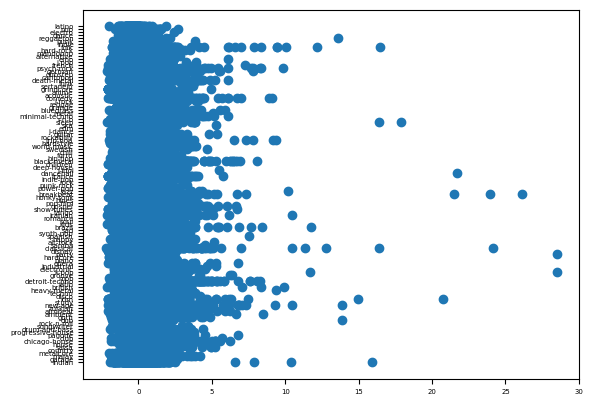

In [74]:
# Representation based on the first feature of X
plt.scatter(X_train.T[0], y_train)
plt.tick_params(axis='both', which='major', labelsize=5)
plt.show()

In [7]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [11]:
clf.intercept_

array([ 1.40358079,  1.57528115,  0.13879269,  1.31877373, -0.86560802,
        1.33219202, -2.28278376, -0.98295645,  2.07357639,  1.65014336,
        0.90873009,  1.87273127, -0.58936635, -1.79231442, -2.82599669,
        0.48081969,  0.15864627,  2.3095792 , -0.98833736, -0.37231468,
       -3.84457595,  0.82197841, -1.59797622, -0.13257702, -1.6933616 ,
        0.94379744, -0.48325527, -0.35204549,  2.02313038, -0.24470031,
       -0.31078915,  0.35665885,  2.28839284,  1.92302487,  1.71039051,
       -1.94179511,  2.12806226,  0.39254533,  2.28619285,  2.11250129,
       -0.68033704,  1.36040629, -3.29002791,  2.1946116 ,  0.68092356,
        0.29472817, -1.6430695 ,  1.06419239,  1.5515902 , -0.91742557,
       -0.40189508, -0.22507888, -2.6637544 ,  0.57920464, -0.44030696,
        2.24413968,  0.5091425 ,  1.97466746,  1.81476315, -9.35381345,
        1.87365763, -0.50496362,  1.33039162,  1.2741672 , -0.54598038,
        0.18752876, -2.11406034, -1.33227827, -0.96523356,  1.51

- Log regression without RS

In [8]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

                   precision    recall  f1-score   support

         acoustic       0.16      0.13      0.15       224
         afrobeat       0.24      0.15      0.18       255
         alt-rock       0.00      0.00      0.00        55
      alternative       0.12      0.09      0.10       184
          ambient       0.32      0.41      0.36       222
            anime       0.08      0.04      0.06       186
      black-metal       0.37      0.48      0.42       232
        bluegrass       0.22      0.26      0.24       270
            blues       0.04      0.01      0.01       167
           brazil       0.04      0.03      0.03       224
        breakbeat       0.22      0.16      0.18       233
          british       0.00      0.00      0.00       152
         cantopop       0.18      0.23      0.20       229
    chicago-house       0.32      0.41      0.36       241
         children       0.29      0.53      0.37       268
            chill       0.09      0.08      0.08       

- Random Search

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the parameter distributions
param_dist = {
    'C': uniform(0.001, 10),  # Regularization parameter (uniform distribution between 0.001 and 10)
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver type
    'max_iter': [100, 500, 1000],  # Maximum number of iterations
    'multi_class': ['multinomial'],  # Multinomial loss for multi-class problems
    'random_state': [42],
}

# Initialize logistic regression classifier
clf = LogisticRegression()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=10,
                                   cv=5, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-validation Accuracy:", random_search.best_score_)

# Evaluate on the test set (final evaluation)
y_test_pred = best_clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(classification_report(y_test, y_pred,zero_division=0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 7.320939418114051, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'newton-cg'}
Best Cross-validation Accuracy: 0.24751623376623377


NameError: name 'best_clf' is not defined

In [81]:
params = {
    'C': 7.320939418114051,
    'max_iter': 100,
    'random_state': 42,
    'solver': 'newton-cg'
}

# Initialize logistic regression classifier with optimal parameters
clf = LogisticRegression(**params)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

                   precision    recall  f1-score   support

         acoustic       0.16      0.13      0.14       270
         afrobeat       0.24      0.15      0.18       299
         alt-rock       0.00      0.00      0.00        73
      alternative       0.13      0.10      0.11       229
          ambient       0.31      0.38      0.34       273
            anime       0.07      0.04      0.05       225
      black-metal       0.36      0.47      0.41       277
        bluegrass       0.22      0.29      0.25       311
            blues       0.00      0.00      0.00       217
           brazil       0.05      0.03      0.04       277
        breakbeat       0.19      0.15      0.17       278
          british       0.00      0.00      0.00       178
         cantopop       0.17      0.27      0.21       267
    chicago-house       0.33      0.43      0.37       295
         children       0.29      0.53      0.38       329
            chill       0.08      0.05      0.06       

- Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter (specific values)
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],  # Solver type
    'max_iter': [100, 500, 1000],  # Maximum number of iterations
    'multi_class': ['multinomial'],  # Multinomial loss for multi-class problems
    'random_state': [42],
}

# Initialize logistic regression classifier
clf = LogisticRegression()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5,
                           scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 'random_state': 42, 'solver': 'newton-cg'}
Best Cross-validation Accuracy: 0.24643939393939393


In [12]:
params = {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 
          'random_state': 42, 'solver': 'newton-cg'}

# Initialize logistic regression classifier with optimal parameters
clf = LogisticRegression(**params)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.25186363636363635
                   precision    recall  f1-score   support

         acoustic       0.18      0.13      0.15       224
         afrobeat       0.23      0.14      0.18       255
         alt-rock       0.00      0.00      0.00        55
      alternative       0.13      0.11      0.12       184
          ambient       0.33      0.41      0.37       222
            anime       0.07      0.04      0.05       186
      black-metal       0.38      0.48      0.43       232
        bluegrass       0.22      0.29      0.25       270
            blues       0.05      0.01      0.01       167
           brazil       0.04      0.03      0.03       224
        breakbeat       0.20      0.15      0.17       233
          british       0.00      0.00      0.00       152
         cantopop       0.16      0.24      0.20       229
    chicago-house       0.32      0.42      0.37       241
         children       0.29      0.56      0.38       268
            chill  

## Clustering genres

Dimensionality reduction with PCA

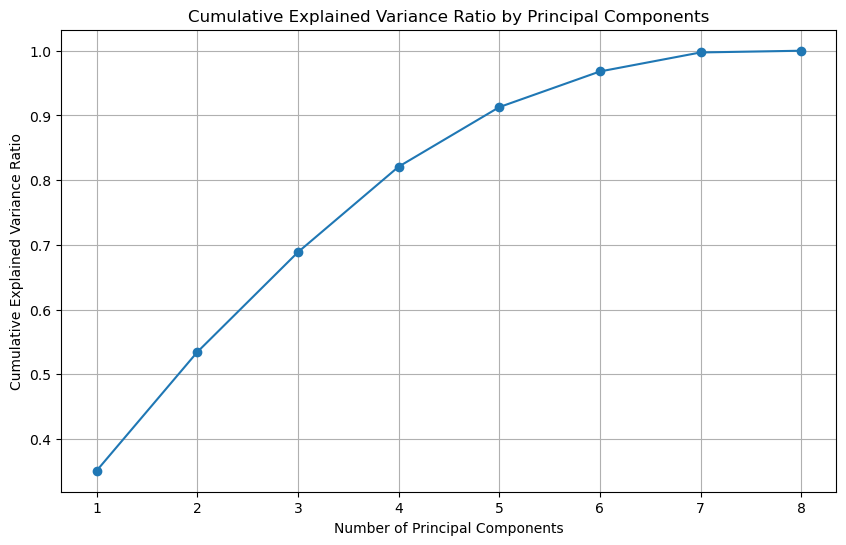

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting the continuous attributes for PCA
selected_attributes = ['danceability', 'energy', 'speechiness', 'instrumentalness', 'liveness', 
                         'valence', 'popularity', 'duration_ms']

# Creating a DataFrame with only the selected continuous attributes
df_sel = df[selected_attributes]

# Standardizing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sel_minmax = scaler.fit_transform(df_sel)

# Performing PCA
pca = PCA()
pca.fit(df_sel_minmax)

# Plotting the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [15]:
# Retaining the first five principal components
pca = PCA(n_components=5)
principal_components = pca.fit_transform(df_sel_minmax)
# Creating a DataFrame for the principal components
df_principal_components = pd.DataFrame(data=principal_components, 
                                       columns=['PC1','PC2','PC3','PC4','PC5'])

In [19]:
# Concatenating 'genre' and 'id' columns from df_tracks to df_principal_components
df_principal_components['genre'] = df_imported['genre']
df_principal_components['id'] =df_imported['id']

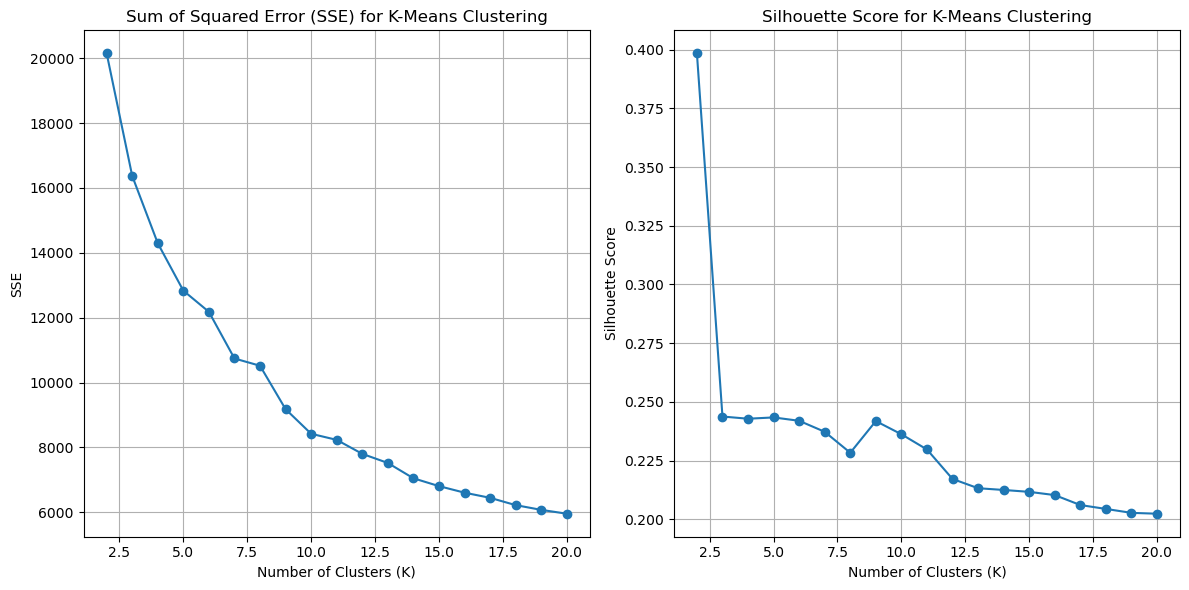

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Selecting the principal components for clustering (assuming PC=5)
X = df_principal_components[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]

# Iterating over different values of K and calculating SSE and Silhouette Score
sse = []
silhouette_scores = []
for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    
    # SSE
    sse.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plotting SSE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 21), sse, marker='o', linestyle='-')
plt.title('Sum of Squared Error (SSE) for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
plt.grid(True)

# Plotting Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 21), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

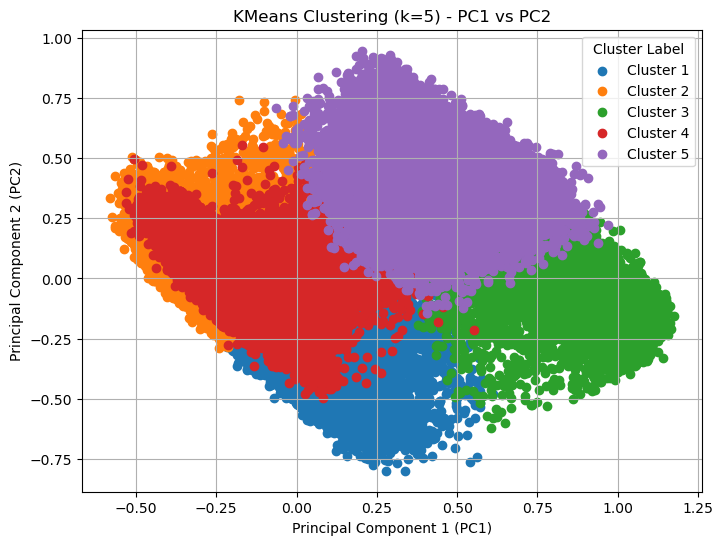

In [22]:
# Perform KMeans clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Add cluster labels to the DataFrame
df_principal_components['Cluster_Labels'] = kmeans.labels_

# Define custom cluster labels
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

# Visualize the clusters in 2D using PC1 and PC2
plt.figure(figsize=(8, 6))
# Scatter plot with custom cluster labels
for cluster_label in range(5):
    plt.scatter(df_principal_components.loc[df_principal_components['Cluster_Labels'] == cluster_label, 'PC1'],
                df_principal_components.loc[df_principal_components['Cluster_Labels'] == cluster_label, 'PC2'],
                label=cluster_labels[cluster_label])

plt.title('KMeans Clustering (k=5) - PC1 vs PC2')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
# Add custom cluster labels to legend
plt.legend(title='Cluster Label')
plt.grid(True)
plt.show()

In [38]:
# Assign values from df_principal_components to df_tracks using iloc
df['cluster_label'] = df_principal_components['Cluster_Labels'].iloc[:]

In [43]:
# Save the selected columns to a CSV file
df.to_csv('df_classification_clusters.csv',index=False)

In [44]:
df_imported.to_csv('df_complete_classification_clusters.csv',index=False)

In [41]:
cluster_label_mapping = {
    0: "Low_insMid_en",
    1: "Low_insLow_en",
    2: "Low_insHigh_en",
    3: "High_insLow_en",
    4: "High_insHigh_en"
}

# Map the numerical cluster labels to the string labels
df_imported['cluster_label'] = df_imported['cluster_label'].map(cluster_label_mapping)

# Display the DataFrame to see the result
df_imported

,duration_ms,popularity,album_total_tracks,danceability,energy,speechiness,instrumentalness,liveness,valence,time_signature,...,explicit,artists,album_type,album_name,album_release_date,genre,primary_artist_id,other_artists_id,other_artists_popularity,cluster_label
0,290479.0,52.0,13.0,0.532,0.517,0.4930,0.535000,0.0854,0.2390,3.0,...,0.0,Kölsch,album,1989,2017-09-22,minimal-techno,2D9Oe8R9UhbMvFAsMJpXj0,[],[],High_insHigh_en
1,539229.0,45.0,8.0,0.750,0.340,0.0326,0.648000,0.1060,0.1450,4.0,...,0.0,Kiasmos,album,Kiasmos,2014-10-27,minimal-techno,6X8lhZ7YaRUBlOsOYimlyD,[],[],Low_insHigh_en
2,264200.0,39.0,10.0,0.801,0.639,0.1040,0.466000,0.0688,0.3200,3.0,...,0.0,Joris Delacroix,album,Night Visions,2018-06-22,minimal-techno,3HRRzIZNQFus3xlUx2xKy1,[],[],High_insHigh_en
3,387413.0,0.0,7.0,0.675,0.543,0.0639,0.719000,0.1120,0.0374,4.0,...,0.0,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,2019-12-06,minimal-techno,6OQOvP7RAdmAKVXXQqD0Se,['7icoOm5fKKPo49jVxoj1Cq'],[40],High_insHigh_en
4,248956.0,0.0,13.0,0.761,0.671,0.0418,0.917000,0.1150,0.1190,4.0,...,0.0,Kollektiv Turmstrasse,compilation,10 Years Diynamic,2016-09-16,minimal-techno,1oXiuCd5F0DcnmXH5KaM6N,[],[],High_insHigh_en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87995,209655.0,23.0,2.0,0.466,0.982,0.0752,0.323000,0.3580,0.3700,4.0,...,1.0,David Guetta;Bebe Rexha;REAPER,single,I'm Good (Blue) [REAPER Remix],2022-10-21,edm,1Cs0zKBU1kc0i8ypK3B9ai,"['64M6ah0SkkRsnPGtGiRAbb', '24kY0bUku58QhWv5WF...","[79, 50]",High_insLow_en
87996,205724.0,56.0,1.0,0.666,0.720,0.0269,0.000000,0.0793,0.3120,4.0,...,1.0,Danny Avila,single,End Of The Night,2018-11-16,edm,5y3G1B8cpCTaoq0uDgjwzH,[],[],Low_insMid_en
87997,195853.0,80.0,28.0,0.813,0.627,0.0486,0.000616,0.1310,0.8010,4.0,...,1.0,David Guetta;Akon,album,One More Love,2010-11-22,edm,1Cs0zKBU1kc0i8ypK3B9ai,['0z4gvV4rjIZ9wHck67ucSV'],[79],Low_insLow_en
87998,208698.0,60.0,1.0,0.653,0.779,0.0392,0.000001,0.0392,0.3870,4.0,...,0.0,Diviners;Philly K.,single,Savannah,2015-11-25,edm,22lnnGKlaDxk8sfzCNRJuA,['1v8lhkt5jZgHT8xi1wYNUS'],[38],High_insLow_en


#### Classifying 5 clusters

In [47]:
X = df[data].values
y = np.array(df['cluster_label'])

In [57]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [58]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [59]:
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.9954220779220779
                 precision    recall  f1-score   support

High_insHigh_en       0.98      0.99      0.99      2999
 High_insLow_en       1.00      0.99      1.00      6002
 Low_insHigh_en       0.99      0.99      0.99      1923
  Low_insLow_en       1.00      1.00      1.00      8880
  Low_insMid_en       1.00      1.00      1.00      6596

       accuracy                           1.00     26400
      macro avg       0.99      0.99      0.99     26400
   weighted avg       1.00      1.00      1.00     26400



#### Predicting the class Explicit

In [69]:
df_ex = pd.read_csv(r"\df_classification_clusters.csv")

In [127]:
df_imported['explicit'].value_counts()

explicit
0.0    80420
1.0     7580
Name: count, dtype: int64

In [128]:
df_ex['genre'] = df_imported['genre']

In [129]:
data = ['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers']#, 'cluster_label', 'genre']

X = df_ex[data]
y = np.array(df_ex['explicit'])

In [130]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [131]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.9142532467532467
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96     24164
         1.0       0.56      0.10      0.17      2236

    accuracy                           0.92     26400
   macro avg       0.74      0.55      0.56     26400
weighted avg       0.89      0.92      0.89     26400



#### Hot-encoding feature cluster label

In [132]:
df_ex['cluster_label'].values.reshape(-1, 1)

array([['High_insHigh_en'],
       ['Low_insHigh_en'],
       ['High_insHigh_en'],
       ...,
       ['Low_insLow_en'],
       ['High_insLow_en'],
       ['Low_insMid_en']], dtype=object)

In [133]:
encoder = OneHotEncoder()

# Fit and transform the feature column
encoded = encoder.fit_transform(df_ex['cluster_label'].values.reshape(-1, 1))

In [134]:
encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0])

In [135]:
df_encoded = pd.concat([df_ex, encoded_df], axis=1)


In [136]:
df_encoded = df_encoded.drop(['cluster_label'], axis=1)

### Hot-encoding Genre

In [137]:
encoder = OneHotEncoder()

# Fit and transform the feature column
encoded = encoder.fit_transform(df_ex['genre'].values.reshape(-1, 1))

In [138]:
encoded_genre_df = pd.DataFrame(encoded.toarray(), columns=encoder.categories_[0])

In [139]:
df_encoded = pd.concat([df_encoded, encoded_genre_df], axis=1)

In [140]:
df_encoded = df_encoded.drop(['genre'], axis=1)

## Creating X and y for classification of Explicit with the hot encoded version

In [162]:
X = df_encoded.drop('explicit', axis=1).values
y = np.array(df_encoded['explicit'])

In [163]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [164]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [165]:
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.9214935064935065
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     24164
         1.0       0.65      0.23      0.34      2236

    accuracy                           0.92     26400
   macro avg       0.79      0.61      0.65     26400
weighted avg       0.91      0.92      0.91     26400



### Random Oversampling the minority class

In [166]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# Initialize RandomOverSampler
rus = RandomOverSampler(random_state=42)
# Resample the training data
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 56256, 1.0: 56256})


In [167]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_res, y_res)

LogisticRegression(max_iter=1000, random_state=42)

In [168]:
y_pred_train = clf.predict(X_res)
accuracy_train = accuracy_score(y_res, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.8093714448236633
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     24164
         1.0       0.26      0.84      0.40      2236

    accuracy                           0.78     26400
   macro avg       0.62      0.81      0.63     26400
weighted avg       0.92      0.78      0.83     26400



### LOG-REG tuned for unbalanced classification

In [265]:
X = df_encoded.drop('explicit', axis=1).values
y = np.array(df_encoded['explicit'])

In [266]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [267]:
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, penalty='l1', solver='saga')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=42, solver='saga')

In [268]:
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.7841720779220779
              precision    recall  f1-score   support

         0.0       0.98      0.78      0.87     24164
         1.0       0.26      0.84      0.40      2236

    accuracy                           0.78     26400
   macro avg       0.62      0.81      0.63     26400
weighted avg       0.92      0.78      0.83     26400



### Tuning decision threshold

In [269]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming clf is your trained logistic regression model
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

thresholds = [0.6, 0.65, 0.45, 0.5, 0.55]  # Example thresholds to try
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Threshold: 0.60, Precision: 0.31, Recall: 0.76, F1-score: 0.44
Threshold: 0.65, Precision: 0.34, Recall: 0.71, F1-score: 0.46
Threshold: 0.45, Precision: 0.24, Recall: 0.87, F1-score: 0.37
Threshold: 0.50, Precision: 0.26, Recall: 0.84, F1-score: 0.40
Threshold: 0.55, Precision: 0.28, Recall: 0.80, F1-score: 0.42


In [272]:
#clf = LogisticRegression(random_state=42, max_iter=1000, penalty='l1', solver='saga')
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)



In [283]:
# Predict probabilities for class 1 on the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
optimal_threshold = 0.72
y_pred_optimal = (y_pred_prob > optimal_threshold).astype(int)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred_optimal,zero_division=0))

Train accuracy: 0.7841720779220779
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93     24164
         1.0       0.38      0.62      0.48      2236

    accuracy                           0.88     26400
   macro avg       0.67      0.77      0.71     26400
weighted avg       0.91      0.88      0.90     26400



## Oversampling with SMOTE-Tomek

In [284]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

In [285]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_resampled, y_resampled)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', accuracy_train)

Train accuracy: 0.7851785714285714


In [286]:
# Assuming clf is your trained logistic regression model
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

thresholds = [0., 0.4, 0.5, 0.6, 0.7]  # Example thresholds to try
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Threshold: 0.30, Precision: 0.19, Recall: 0.93, F1-score: 0.31
Threshold: 0.40, Precision: 0.22, Recall: 0.89, F1-score: 0.35
Threshold: 0.50, Precision: 0.26, Recall: 0.84, F1-score: 0.40
Threshold: 0.60, Precision: 0.31, Recall: 0.76, F1-score: 0.44
Threshold: 0.70, Precision: 0.37, Recall: 0.65, F1-score: 0.47


In [292]:
# Predict probabilities for class 1 on the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
optimal_threshold = 0.78
y_pred_optimal = (y_pred_prob > optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_optimal,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94     24164
         1.0       0.43      0.54      0.48      2236

    accuracy                           0.90     26400
   macro avg       0.69      0.74      0.71     26400
weighted avg       0.91      0.90      0.90     26400



## SMOTEENN

In [205]:
from imblearn.combine import SMOTEENN

In [210]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [211]:
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_resampled, y_resampled)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', accuracy_train)

Train accuracy: 0.7412012987012987


In [226]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'C': uniform(0.1, 10),    # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solver for logistic regression
    'class_weight': ['balanced', None],  # Class weight
    'max_iter': randint(100, 1000)  # Maximum number of iterations
}

# Create the random search model
random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings that are sampled
    scoring='accuracy',  # Metric to optimize
    cv=5,  # Cross-validation folds
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Perform the random search
random_search.fit(X_resampled, y_resampled)

# Print the best parameters found
print("Best parameters found:")
print(random_search.best_params_)

# Evaluate the best model on the training set
best_clf = random_search.best_estimator_
y_pred_train = best_clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', accuracy_train) 

Best parameters found:
{'C': 1.295942459383017, 'class_weight': None, 'max_iter': 742, 'penalty': 'l1', 'solver': 'liblinear'}
Train accuracy: 0.7411688311688311


In [212]:
# Assuming clf is your trained logistic regression model
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example thresholds to try
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Threshold: 0.30, Precision: 0.18, Recall: 0.94, F1-score: 0.31
Threshold: 0.40, Precision: 0.20, Recall: 0.91, F1-score: 0.33
Threshold: 0.50, Precision: 0.23, Recall: 0.88, F1-score: 0.36
Threshold: 0.60, Precision: 0.26, Recall: 0.84, F1-score: 0.40
Threshold: 0.70, Precision: 0.30, Recall: 0.78, F1-score: 0.43


In [225]:
# Predict probabilities for class 1 on the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Apply the optimal threshold
optimal_threshold = 0.33
y_pred_optimal = (y_pred_prob > optimal_threshold).astype(int)

print(classification_report(y_test, y_pred_optimal,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.99      0.63      0.77     24164
         1.0       0.19      0.94      0.32      2236

    accuracy                           0.66     26400
   macro avg       0.59      0.78      0.54     26400
weighted avg       0.92      0.66      0.73     26400



In [227]:
params = {'C': 1.295942459383017, 'class_weight': None,
          'max_iter': 742, 'penalty': 'l1', 'solver': 'liblinear'}

clf = LogisticRegression(**params)
clf.fit(X_resampled, y_resampled)
y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print('Train accuracy:', accuracy_train)

Train accuracy: 0.7411688311688311


In [230]:
# Assuming clf is your trained logistic regression model
y_pred_prob = clf.predict_proba(X_test)[:, 1]  # Probabilities for class 1

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]  # Example thresholds to try
for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    print(f"Threshold: {threshold:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

Threshold: 0.30, Precision: 0.18, Recall: 0.95, F1-score: 0.31
Threshold: 0.40, Precision: 0.20, Recall: 0.91, F1-score: 0.33
Threshold: 0.50, Precision: 0.23, Recall: 0.88, F1-score: 0.36
Threshold: 0.60, Precision: 0.26, Recall: 0.84, F1-score: 0.40
Threshold: 0.70, Precision: 0.30, Recall: 0.78, F1-score: 0.43


In [229]:
y_pred= clf.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84     24164
         1.0       0.23      0.88      0.36      2236

    accuracy                           0.74     26400
   macro avg       0.61      0.80      0.60     26400
weighted avg       0.92      0.74      0.80     26400



## Mapping instead of hot-encoding

In [241]:
cluster_labesl = df_ex['cluster_label'].unique()
genres = df_ex['genre'].unique()

mapping_cl = {}
mapping_genres = {}

i, j= 0, 0
#mapping cl
for element in cluster_labesl:
    mapping_cl[element] = i
    i+=1
# mapping genre
for element in genres:
    mapping_genres[element] = j
    j+=1

In [260]:
# Apply the mapping to the cluster_label column
df_ex['cluster_label'] = df_ex['cluster_label'].map(mapping_cl)
df_ex['genre'] = df_ex['genre'].map(mapping_genres)

In [262]:
data = ['duration_ms', 'popularity', 'danceability',
       'energy', 'speechiness', 'instrumentalness', 'liveness', 'valence',
       'time_signature', 'n_beats', 'fade_out_duration',
       'primary_artist_popularity', 'average_artists_popularity',
       'sum_of_followers', 'cluster_label', 'genre']

X = df_ex[data]
y = np.array(df_ex['explicit'])

In [263]:
# Splitting in train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# scaling data
scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [264]:
clf = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000, penalty='l1', solver='saga')
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

y_pred = clf.predict(X_test)
print('Train accuracy:', accuracy_train)
print(classification_report(y_test, y_pred,zero_division=0))

Train accuracy: 0.7536363636363637
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85     24164
         1.0       0.22      0.73      0.33      2236

    accuracy                           0.75     26400
   macro avg       0.59      0.74      0.59     26400
weighted avg       0.90      0.75      0.80     26400

